# Noteboook for High Frequency SSVEP 
Jimmy Pulido Arias 

In [106]:
# Import libraries
import os
import sys
import numpy as np 
import seaborn  as sns 
import pandas as pd 
import mne
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, module_path)
%matplotlib inline


## Read Data 

In [107]:
from eegtools.eegprocessor import EEGProcessor
from eegtools.fbcca import FBCCA
from eegtools.psd import PSDAnalyzer

stimuli_ids = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"] 
frequencies = [32.5, 34.0, 31.5, 35.5, 34.5, 30.0, 33.5, 30.5, 32.0, 35.0, 31.0, 33.0]

In [125]:
stimuli_time = 5
delay = [0,0,0,1]

file_names = ["arim_3x4_high.bdf", "netflix_offline_3x4_jimmy.bdf", "netflix_offline_3x4_05step_jimmy.bdf", "netflix_offline_3x4_yugyeong.bdf"]

eegdf_list = []
for file_name, d in zip(file_names, delay): 

    eegdf = EEGProcessor(path=file_name, stimuli_ids=stimuli_ids, 
                root="/home/cnelab-workstation/jimmy/SSVEP_highfrequency/neflix_experiment/data/", 
                stimuli_time=5, delay=d)
    eegdf.preprocess_eeg(pick_channels=EEGProcessor._channels_o, l_freq=0.1, h_freq=200, ch_reference='Cz')
    eegdf.get_epochs()
    eegdf_list.append(eegdf.epochs)

Extracting EDF parameters from /home/cnelab-workstation/jimmy/SSVEP_highfrequency/neflix_experiment/data/arim_3x4_high.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3368959  =      0.000 ...  1645.000 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['0', '1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9']
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff

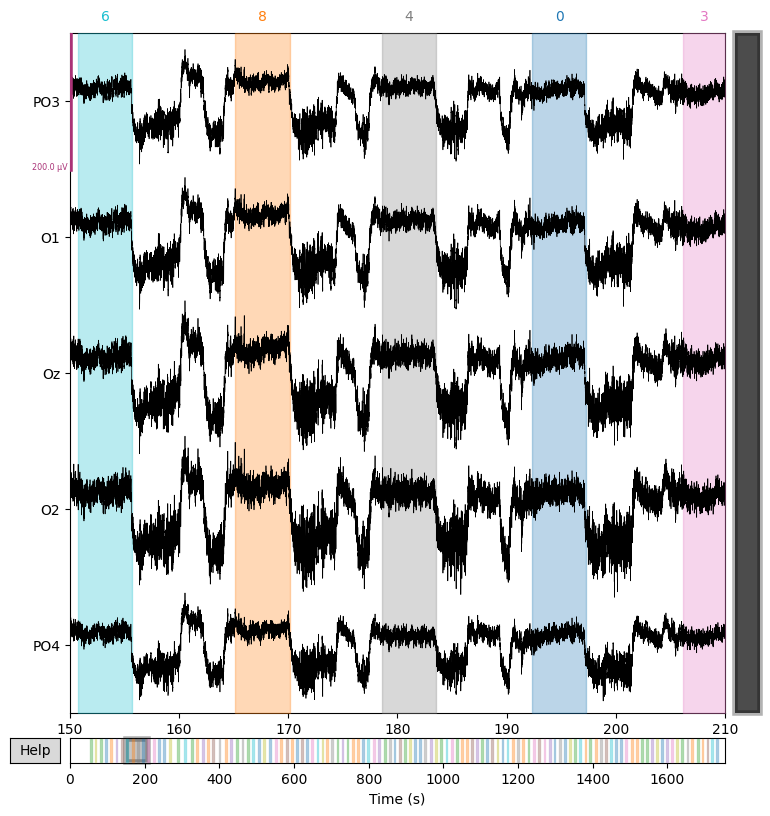

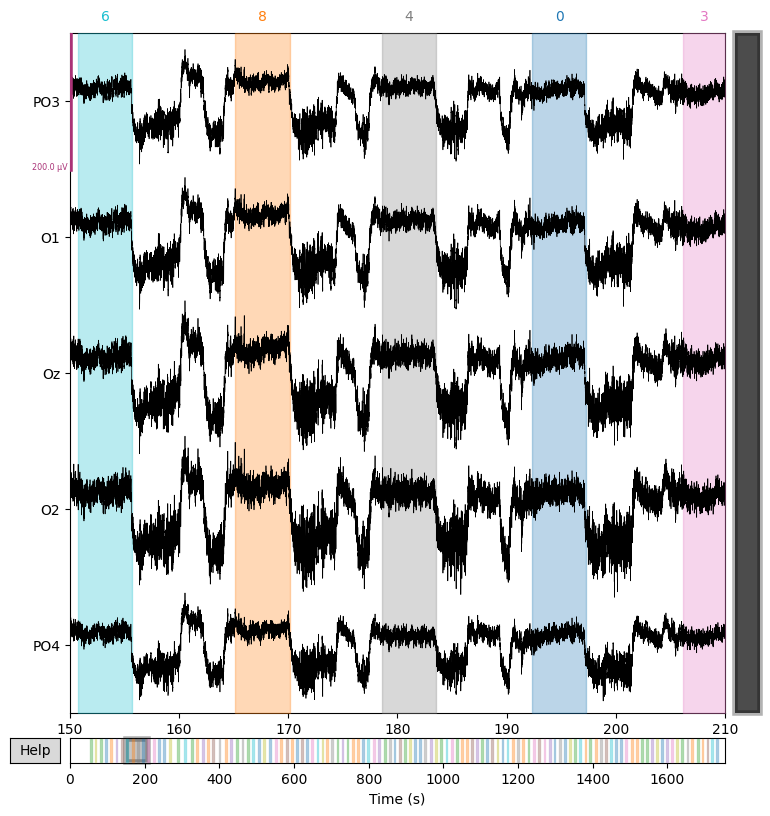

In [126]:
eegdf.raw.plot(start=150, duration=60, scalings=0.0001)

In [127]:
epochs_big = mne.concatenate_epochs(eegdf_list)

Not setting metadata
420 matching events found
Applying baseline correction (mode: mean)


In [8]:
x

array([-4.44534028, -4.35559411, -4.26584794, -4.17610176, -4.08635559,
       -3.99660941, -3.90686324, -3.81711707, -3.72737089, -3.63762472,
       -3.54787855, -3.45813237, -3.3683862 , -3.27864002, -3.18889385,
       -3.09914768, -3.0094015 , -2.91965533, -2.82990916, -2.74016298,
       -2.65041681, -2.56067063, -2.47092446, -2.38117829, -2.29143211,
       -2.20168594, -2.11193977, -2.02219359, -1.93244742, -1.84270125,
       -1.75295507, -1.6632089 , -1.57346272, -1.48371655, -1.39397038,
       -1.3042242 , -1.21447803, -1.12473186, -1.03498568, -0.94523951,
       -0.85549333, -0.76574716, -0.67600099, -0.58625481, -0.49650864,
       -0.40676247, -0.31701629, -0.22727012, -0.13752394, -0.04777777,
        0.0419684 ,  0.13171458,  0.22146075,  0.31120692,  0.4009531 ,
        0.49069927,  0.58044545,  0.67019162,  0.75993779,  0.84968397,
        0.93943014,  1.02917631,  1.11892249,  1.20866866,  1.29841483,
        1.38816101,  1.47790718,  1.56765336,  1.65739953,  1.74

# PSD

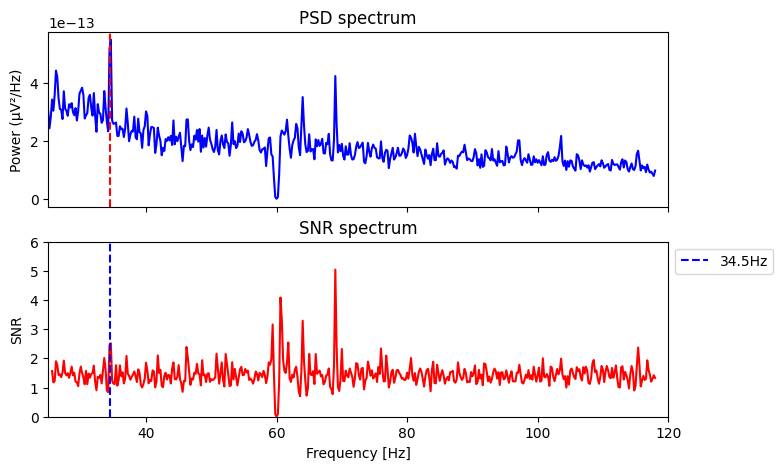

In [128]:
analyzer = PSDAnalyzer(frequencies=frequencies)
psds, freqs, snrs = analyzer.calculate_psd_snr(epochs_big["4"], frequencies)
analyzer.plot_psd_snr(psds, freqs, snrs, frequencies[4], "file_name")

In [113]:
n_seconds = 3
time = np.linspace(0, n_seconds,int(n_seconds * 512) ,
                   endpoint=False)[np.newaxis, :]

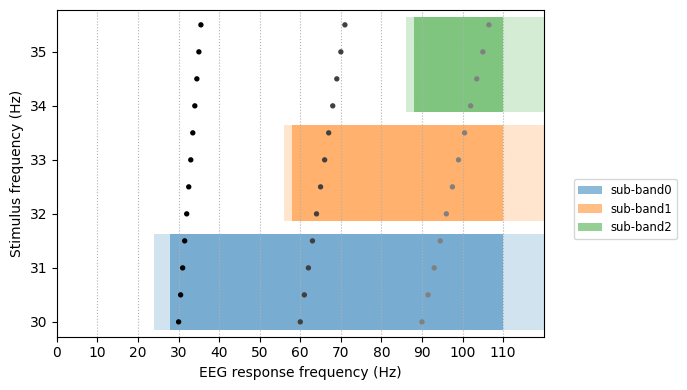

In [149]:
filterbank = [
              [(28, 110), (24, 120)], 
              [(58, 110), (56, 120)],
              [(88, 110), (86, 120)],              ]


f, ax = plt.subplots(1, figsize=(7, 4))
for i, _band in enumerate(filterbank):
    ax.axvspan(ymin=i / len(filterbank) + .02,
               ymax=(i + 1) / len(filterbank) - .02,
               xmin=filterbank[i][1][0], xmax=filterbank[i][1][1],
               alpha=0.2, facecolor=f"C{i}")
    ax.axvspan(ymin=i / len(filterbank) + .02,
               ymax=(i + 1) / len(filterbank) - .02,
               xmin=filterbank[i][0][0], xmax=filterbank[i][0][1],
               alpha=0.5, label=f"sub-band{i}", facecolor=f"C{i}")

for f in frequencies:
    colors = np.ones((3, 4))
    colors[:, :3] = np.linspace(0, .5, 3)[:, None]
    ax.scatter(f * np.arange(1, 4), [f] * 3, c=colors, s=8, zorder=100)

ax.set_ylabel("Stimulus frequency (Hz)")
ax.set_xlabel("EEG response frequency (Hz)")
ax.set_xlim([0, 120])
ax.set_xticks(np.arange(0, 120, 10))
ax.grid(True, ls=":", axis="x")
ax.legend(bbox_to_anchor=(1.05, .5), fontsize="small")
plt.tight_layout()
plt.show()

# FBCCA

In [129]:
multiprocessing.cpu_count()

40

In [150]:
# FBCCA individual
import warnings
import multiprocessing
from concurrent.futures import ProcessPoolExecutor, as_completed


def process_window(w, fs, samples, epochs, frequencies, fbcca_model):
        print(w)
        n_win = w
        n_samples = int(fs * n_win) 
        p = int(samples / n_samples)
        one_epoch = epochs.copy()
        y, y_pred = [], [] 
        Rho = [] 
        for i in range(12): 
            X = one_epoch["{}".format(i)].get_data()
            X = X[:,:,:n_samples]
            print("{}: =============================================".format(i))
            pred, rho = fbcca_model.fbcca(X, frequencies, fs)
            
            y += [i] * len(pred)
            y_pred += pred
            Rho.append(rho)
        return w, y, y_pred, Rho

def run_fbcca_analysis(win_sizes, fs, epochs, frequencies, fbcca_model):
    warnings.filterwarnings('ignore') 
    epochs.resample(sfreq=512.0)
    samples = fs * 5
    results = {}

    num_cores = multiprocessing.cpu_count()
    with ProcessPoolExecutor(max_workers=10) as executor:
        futures = [executor.submit(process_window, w, fs, samples, epochs, frequencies, fbcca_model) for w in win_sizes]
        
        for future in as_completed(futures):
            w, y, y_pred, Rho = future.result()
            results[w] = {
                "y": y,
                "y_pred": y_pred,
                "Rho": Rho
            }
    
    return results

In [151]:
np.round(np.arange(0.2, 5.2, 0.2), 2)

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6,
       2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ])

In [154]:
win_sizes = np.round(np.arange(0.2, 5.2, 0.2), 2)

fbcca_result_list = [] 
for epoh_i in eegdf_list: 

    fs = epoh_i.info["sfreq"]

    fbcca_model = FBCCA(num_harms=2, num_fbs=2, a=1.25, b=0.25)

    results = run_fbcca_analysis(win_sizes, fs, epoh_i, frequencies, fbcca_model)

    fbcca_result_list.append(results)

Sampling frequency of the instance is already 512.0, returning unmodified.
0.2
0: =============================================
0.4
0: =============================================
0.6
0: =============================================
0.8
0: =============================================
1.0
0: =============================================
1.2
0: =============================================
1.4
0: =============================================
1.6
0: =============================================
1.8
0: =============================================
2.0
0: =============================================
1: =============================================
1: =============================================
1: =============================================
1: =============================================
1: =============================================
2: =============================================
2: =============================================
1: =============================================
1: 

In [160]:
len(fbcca_result_list)

4

In [202]:
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import classification_report


def calculate_single_itr(P, num_targets, time_per_trial):
    if P == 0:
        return 0  # Avoid log(0) issue
    elif P == 1.0:
        return np.log2(num_targets) * (60 / time_per_trial)
    else:
        return (np.log2(num_targets) + P * np.log2(P) + (1 - P) * np.log2((1 - P) / (num_targets - 1))) * (60 / time_per_trial)

data = {"Window_size" : [],  
        "Subject" : [], 
        "Accuracy": [], 
        "ITR": []}

for idx, subject in enumerate(fbcca_result_list): 
    for w in win_sizes:
        y, y_pred, Rho = subject[w]["y"], subject[w]["y_pred"], subject[w]["Rho"]
        print(classification_report(y, y_pred, labels=[0,1,2,3,4,6,7,8,9,10,11]) )
        print(top_k_accuracy_score(y, np.array
        (Rho).reshape(len(y_pred),12) , k=1))

        accuracy = top_k_accuracy_score(y, np.array(Rho).reshape(len(y_pred),12) , k=1)
        itr = calculate_single_itr(accuracy, 12, w)
        data[f"Window_size"].append(w)
        data[f"Subject"].append(f"S{idx+1}")
        data[f"Accuracy"].append(accuracy)
        data[f"ITR"].append(itr)

              precision    recall  f1-score   support

           0       0.06      0.10      0.08        10
           1       0.00      0.00      0.00        10
           2       0.07      0.10      0.08        10
           3       0.20      0.20      0.20        10
           4       0.17      0.20      0.18        10
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.11      0.10      0.11        10
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        10

   micro avg       0.06      0.06      0.06       110
   macro avg       0.06      0.06      0.06       110
weighted avg       0.06      0.06      0.06       110

0.06666666666666667
              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.20      0.20      0.20        10
    

In [203]:
df_results = pd.DataFrame(data)

In [204]:
df_results

,Window_size,Subject,Accuracy,ITR
0,0.2,S1,0.066667,0.840096
1,0.4,S1,0.250000,26.866599
2,0.6,S1,0.283333,24.575012
3,0.8,S1,0.400000,40.376470
4,1.0,S1,0.533333,58.426167
...,...,...,...,...
95,4.2,S4,0.608333,18.059311
96,4.4,S4,0.591667,16.319239
97,4.6,S4,0.600000,16.046599
98,4.8,S4,0.608333,15.801897


In [ ]:
df_results.groupby("Window_size")[["Accuracy", "ITR"]].mean()

In [216]:
df_results[df_results["Window_size"] == 5.0].groupby("Subject")[["Accuracy", "ITR"]].mean()

,Accuracy,ITR
Subject,,
S1,0.800000,26.053777
S2,0.833333,28.300418
S3,0.866667,30.686345
S4,0.591667,14.360931


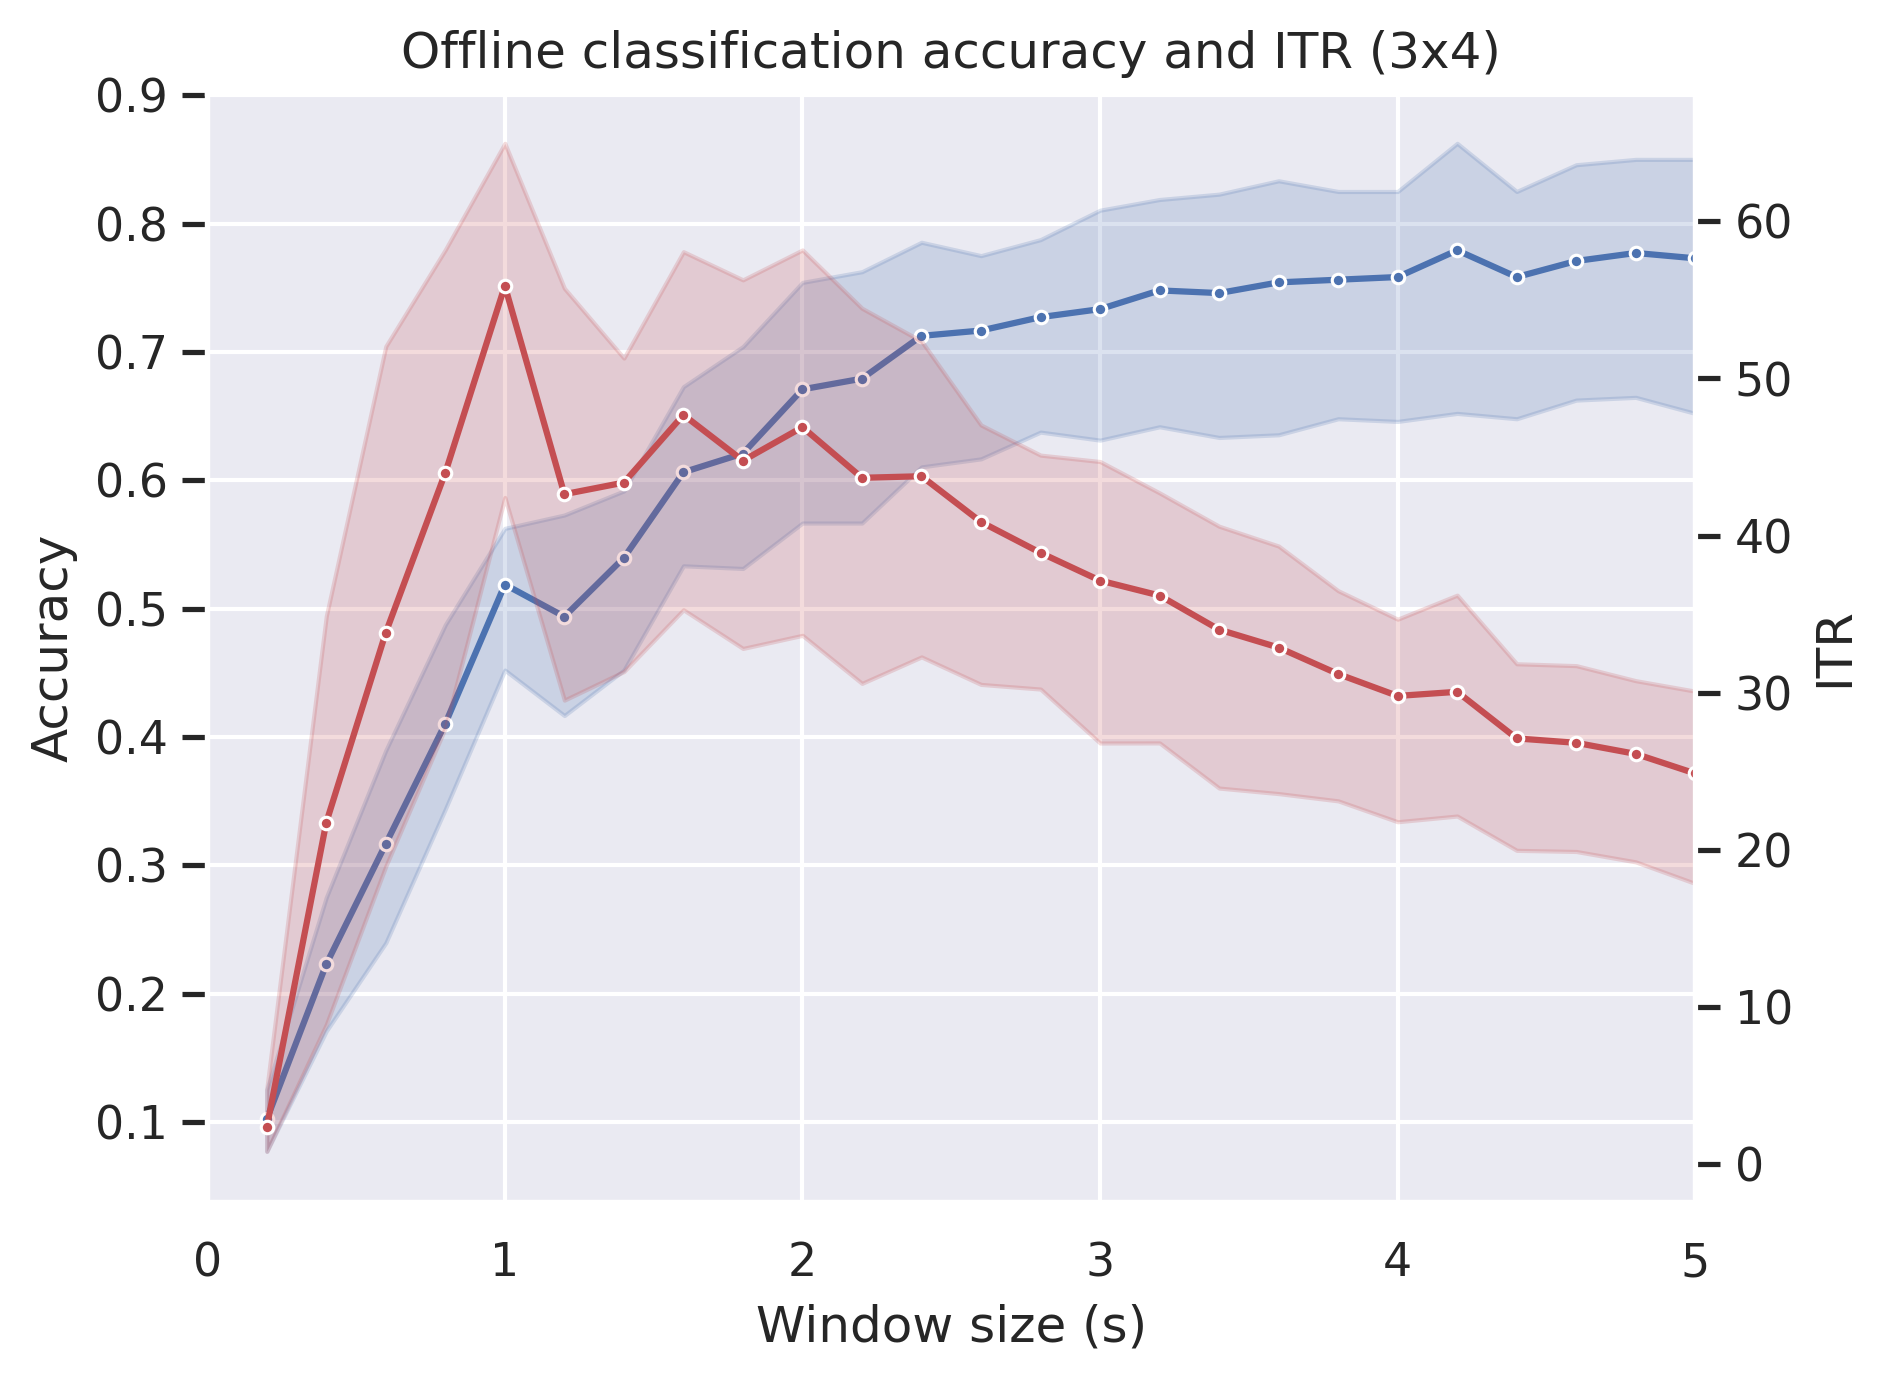

In [215]:
sns.set_theme(rc={"figure.dpi": 300})
ax1 = plt.subplot()
ax2 = ax1.twinx()

sns.lineplot(
    data=df_results,
    x="Window_size", y="Accuracy",
    markers=True, dashes=False, ax=ax1, marker="."
)
sns.lineplot(
    data=df_results,
    x="Window_size", y="ITR",
    markers=True, dashes=False, ax=ax2, color='r', marker=".",
)

ax2.set(
        xlim=[0, 5],
    )

plt.title("Offline classification accuracy and ITR (3x4)")
#plt.axvline(x=win_sizes[accuracy_windowsize.index(1.0)], color='black', linestyle='--',  label="x = 1.4")
ax1.set_xlabel('Window size (s)', fontsize=12)
ax2.grid(False)
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')


<Axes: >

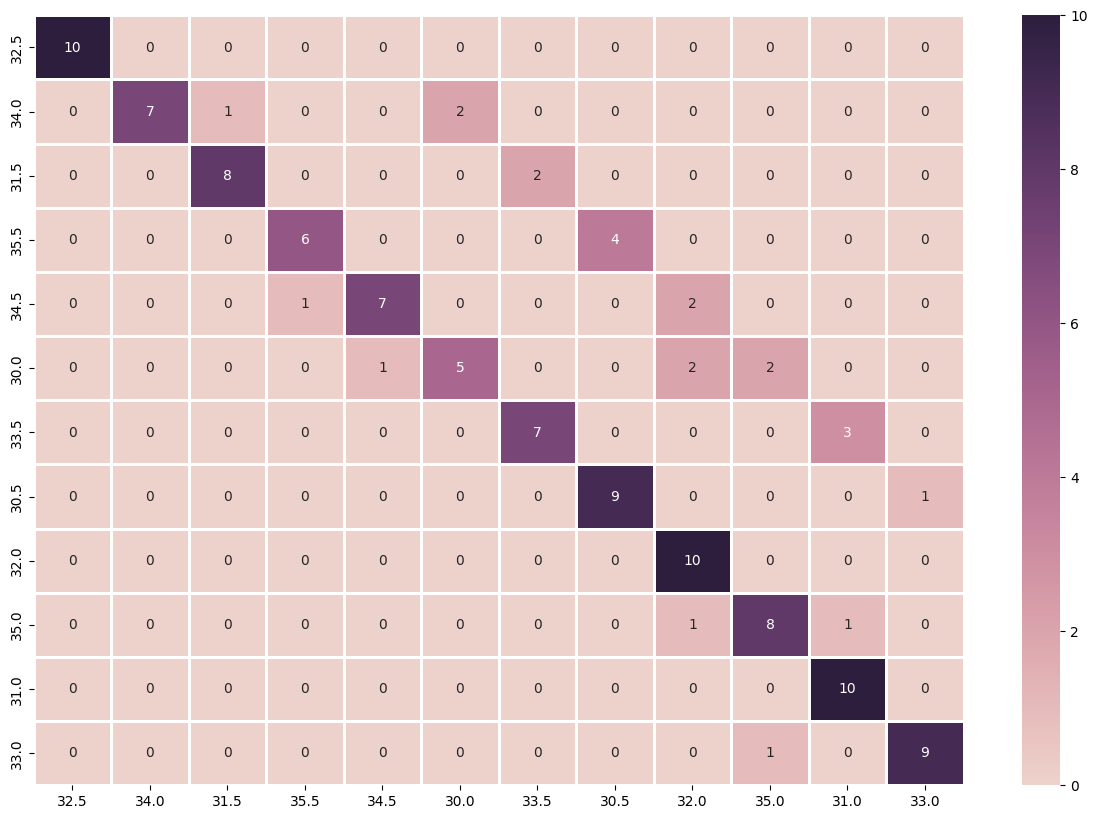

In [184]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y,y_pred)

fig, ax = plt.subplots(figsize=(15,10)) 

sns.heatmap(cf_matrix, linewidths=1, xticklabels= frequencies, yticklabels = frequencies,
 annot=True, ax=ax, fmt='g', cmap=sns.cubehelix_palette(as_cmap=True))

<Axes: >

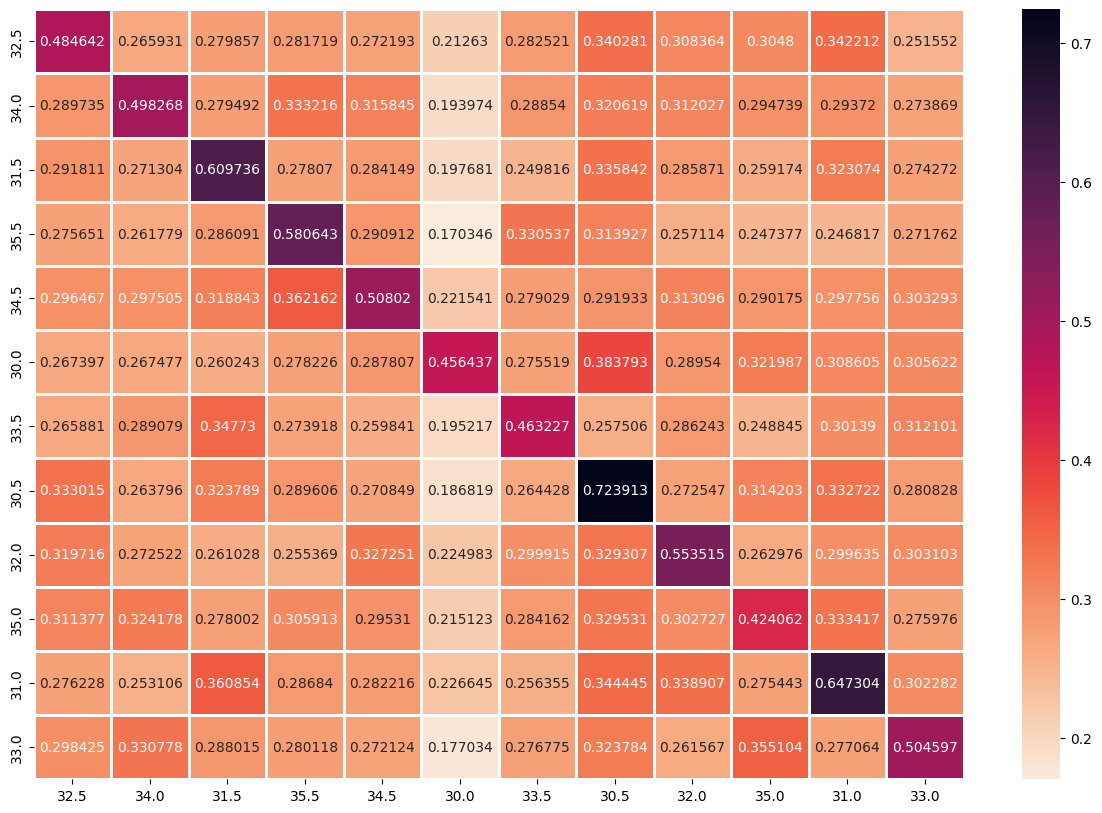

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
y, y_pred, Rho = results[5]["y"], results[5]["y_pred"],results[5]["Rho"]
#print(classification_report(y,y_pred))
correlation_heatmap = np.array(Rho).mean(axis=1)

fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(correlation_heatmap, linewidths=1, xticklabels= frequencies, yticklabels = frequencies, annot=True, ax=ax, fmt='g', cmap=sns.color_palette("rocket_r", as_cmap=True))

#fig.savefig(f"CCA{file_names[0]}", bbox_inches='tight')

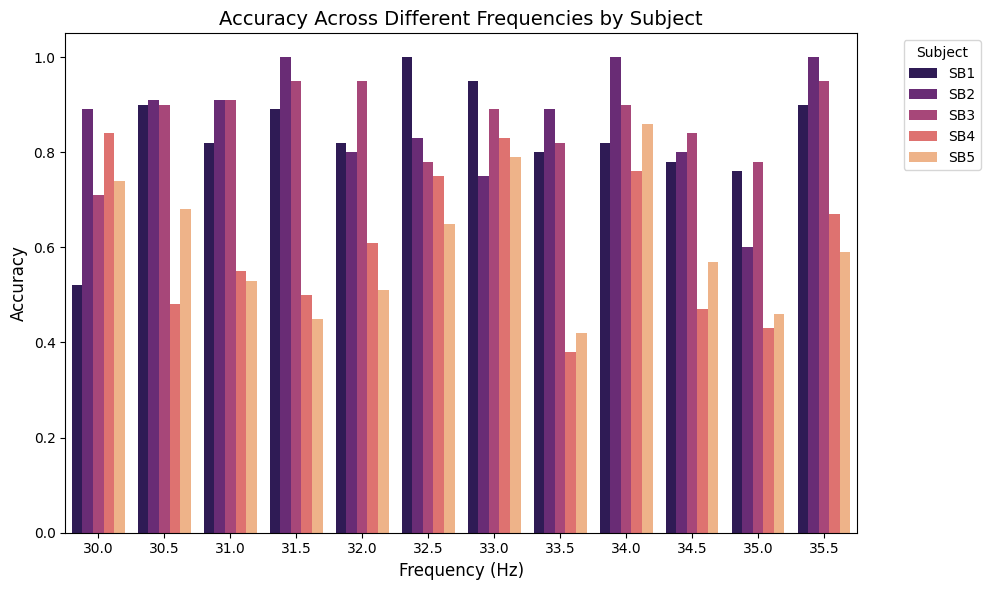

In [202]:
# Data
data = {
    'Frequency (Hz)': [32.5, 34.0, 31.5, 35.5, 34.5, 30.0, 33.5, 30.5, 32.0, 35.0, 31.0, 33.0],
    'SB1': [1.00, 0.82, 0.89, 0.90, 0.78, 0.52, 0.80, 0.90, 0.82, 0.76, 0.82, 0.95],
    'SB2': [0.83, 1.00, 1.00, 1.00, 0.80, 0.89, 0.89, 0.91, 0.80, 0.60, 0.91, 0.75],
    'SB3': [0.78, 0.90, 0.95, 0.95, 0.84, 0.71, 0.82, 0.90, 0.95, 0.78, 0.91, 0.89],
    'SB4': [0.75, 0.76, 0.50, 0.67, 0.47, 0.84, 0.38, 0.48, 0.61, 0.43, 0.55, 0.83],
    'SB5': [0.65, 0.86, 0.45, 0.59, 0.57, 0.74, 0.42, 0.68, 0.51, 0.46, 0.53, 0.79]
}

# Convert the data to a DataFrame for plotting
df = pd.DataFrame(data)

# Melt the DataFrame to a long format for Seaborn
df_melted = df.melt(id_vars='Frequency (Hz)', var_name='Subject', value_name='Accuracy', )

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Frequency (Hz)', y='Accuracy', hue='Subject',  palette='magma')

# Customizing the plot
plt.title('Accuracy Across Different Frequencies by Subject', fontsize=14)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
#plt.xticks(df['Frequency (Hz)'], rotation=45)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


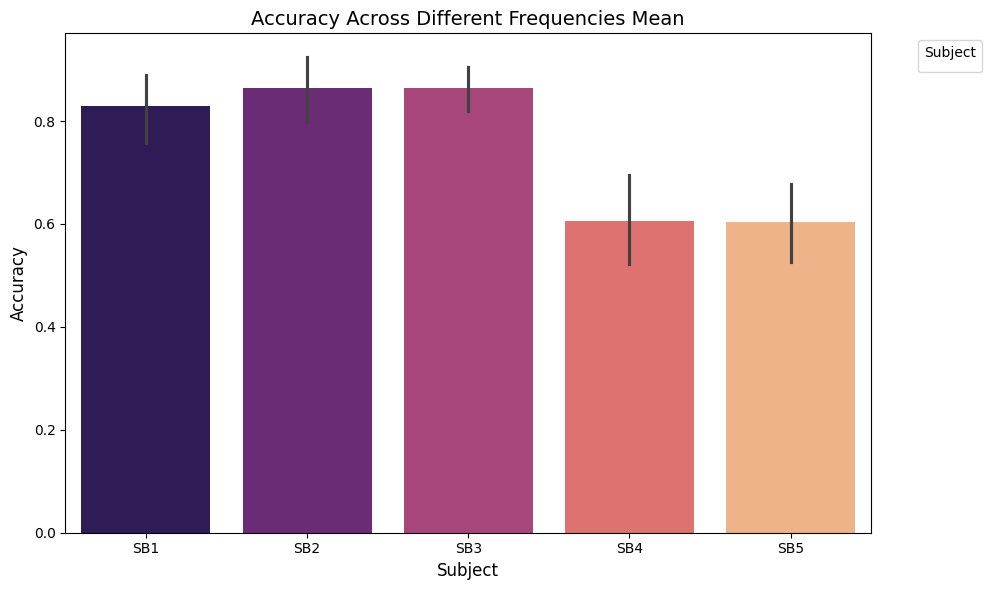

In [200]:
# Data
data = {
    'Frequency (Hz)': [32.5, 34.0, 31.5, 35.5, 34.5, 30.0, 33.5, 30.5, 32.0, 35.0, 31.0, 33.0],
    'SB1': [1.00, 0.82, 0.89, 0.90, 0.78, 0.52, 0.80, 0.90, 0.82, 0.76, 0.82, 0.95],
    'SB2': [0.83, 1.00, 1.00, 1.00, 0.80, 0.89, 0.89, 0.91, 0.80, 0.60, 0.91, 0.75],
    'SB3': [0.78, 0.90, 0.95, 0.95, 0.84, 0.71, 0.82, 0.90, 0.95, 0.78, 0.91, 0.89],
    'SB4': [0.75, 0.76, 0.50, 0.67, 0.47, 0.84, 0.38, 0.48, 0.61, 0.43, 0.55, 0.83],
    'SB5': [0.65, 0.86, 0.45, 0.59, 0.57, 0.74, 0.42, 0.68, 0.51, 0.46, 0.53, 0.79]
}

# Convert the data to a DataFrame for plotting
df = pd.DataFrame(data)

# Melt the DataFrame to a long format for Seaborn
df_melted = df.melt(id_vars='Frequency (Hz)', var_name='Subject', value_name='Accuracy', )

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Subject', y='Accuracy',  palette='magma')

# Customizing the plot
plt.title('Accuracy Across Different Frequencies Mean', fontsize=14)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
#plt.xticks(df['Frequency (Hz)'], rotation=45)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()